In [1]:
from pathlib import Path
from fdrc.utils import load_experiment

from fdrc.experiment1 import (
    make_curves,
    make_power_curve,
    make_fdr_curve,
    make_decay_fdr_curve,
)

# Results directory:
EXPERIMENT_DIR = Path("../results/experiment1")
SAMPLES_DIR = Path("../samples/experiment1")

## Visualizer

In [2]:
recipe, _, results = load_experiment(SAMPLES_DIR / "submitted_revision1")

fig_dest = Path("/Users/barisk/Desktop/to_quentin")

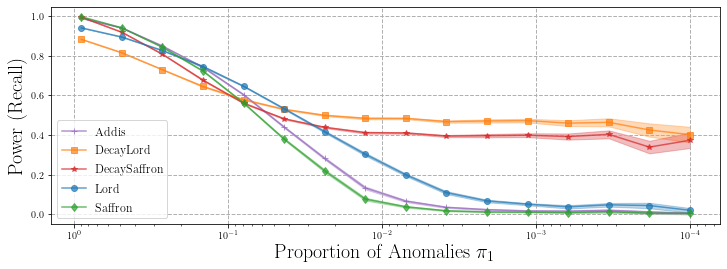

In [6]:
fig = make_power_curve(recipe, results)
fig.savefig(str(fig_dest / "fig1.pdf"), format='pdf', dpi=1200)
fig

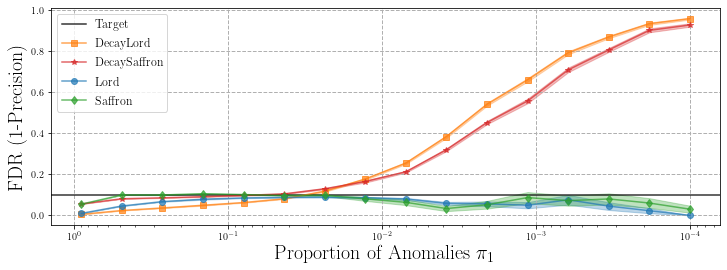

In [7]:
fig = make_fdr_curve(
    recipe, 
    [result for result in results if result["name"] in ["DecayLORDFilter", "DecaySAFFRONFilter", "LORDFilter", "SAFFRONFilter"]], 
    target=0.1
)
fig.savefig(str(fig_dest / "fig2.pdf"), format='pdf', dpi=1200)
fig

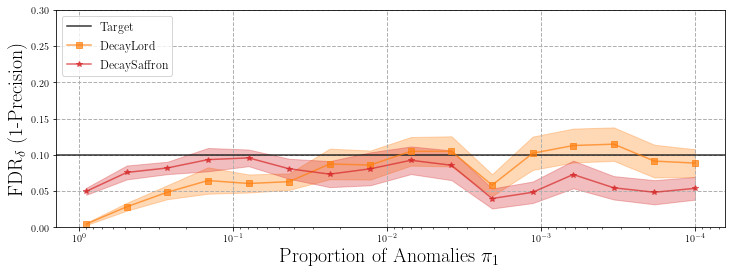

In [9]:
fig = make_decay_fdr_curve(
    recipe, 
    [result for result in results if result["name"] in ["DecayLORDFilter", "DecaySAFFRONFilter"]], 
    target=0.1, 
    y_lim=(0, 0.3),
)
fig.savefig(str(fig_dest / "fig3.pdf"), format='pdf', dpi=1200)
fig

In [ ]:
fig = make_decay_fdr_curve(recipe, results, y_lim=(0, 0.3))
fig.savefig(str(figure_dir / "fig3.pdf"), format='pdf', dpi=1200)

## Submitted with Decay FDR

In [ ]:
recipe, datasets, results = load_experiment(EXPERIMENT_DIR / "submitted-2021-06-03-10-28-37")

In [ ]:
make_power_curve(recipe, results)

In [ ]:
make_fdr_curve(recipe, results)

In [ ]:
make_decay_fdr_curve(recipe, results, y_lim=(0, 0.3))

## Dependent Data Experiment

In [ ]:
#filename = "ar-model-3-2021-06-04-12-36-44"
filename = "ar-model-5-2021-06-04-14-45-54"

recipe, datasets, results = load_experiment(EXPERIMENT_DIR / filename)

In [ ]:
make_power_curve(recipe, results)

In [ ]:
make_fdr_curve(recipe, results)

In [ ]:
make_decay_fdr_curve(recipe, results, y_lim=(0, 0.3))

## Sample Experiment

In [ ]:
from fdrc.artificial_data import make_ar_hypotheses
from fdrc.plots import plot_dataset, plot_result
from fdrc.filters import build_filter

dataset = make_ar_hypotheses(
    anomaly_ratio = 0.1,
    size = 500,
    signal_strength = 4.0,
    noise = 1.0,
    c = 0.0,
    phi = 0.9,
    one_sided = True,
    model = "exact",
    method = "filter",
    window_size = 64
)

f = build_filter("DecayLORDFilter", recipe["filter_params"]["DecayLORDFilter"])
labels, state = f.step(dataset["p_values"])
plot_dataset(dataset, state.threshold_history)